In [1]:
from sklearn.datasets import make_blobs

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x,y=make_blobs(n_samples=500,
    n_features=2,
    centers=5,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=3)

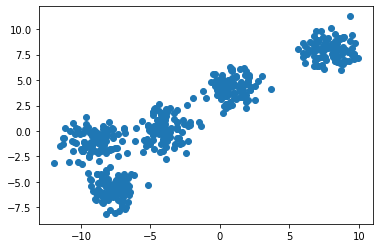

In [7]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [15]:
def distance(p,q):
    return np.sqrt(np.sum((q-p)**2))

In [47]:
k=5
color=["red","orange","green","violet","yellow"]
clusters={}
for i in range(k):
    center=20*np.random.random((x.shape[1],))-10
    point=[]
    cluster={
        'center':center,
        'point':point,
        'color':color[i]
    }
    clusters[i]=cluster
def assignpoints(cluster,x):
    for ix in range(x.shape[0]):
        dist=[]
        curr_x=x[ix]
        for i in range(k):
            d=distance(curr_x,clusters[i]['center'])
            dist.append(d)
        cluster_s=np.argmin(dist)
        clusters[cluster_s]['point'].append(curr_x)
def updateclusters(clusters,x):
    for i in range(k):
        pts=np.array(clusters[i]['point'])
        new=pts.mean(axis=0)
        clusters[i]['center']=new
        clusters[i]['point']=[]
        
    


In [48]:
def plotcluster(clusters):
    
    for i in range(k):
        pts=np.array((clusters[i]['point']))
        if pts.shape[0]>0:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],marker="^",color="brown")

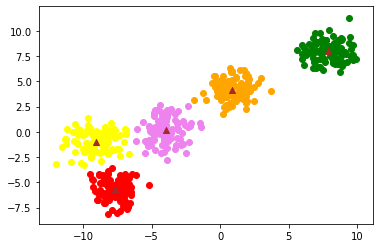

In [57]:
assignpoints(clusters,x)
plotcluster(clusters)
updateclusters(clusters,x)

In [62]:
from sklearn.cluster import KMeans

In [65]:
kmeans=KMeans(n_clusters=5)


In [66]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [67]:
centers=kmeans.cluster_centers_

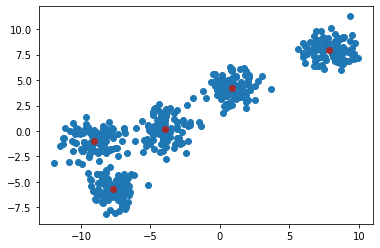

In [70]:
plt.scatter(x[:,0],x[:,1])
plt.scatter(centers[:,0],centers[:,1],color="brown")
plt.show()